<a href="https://colab.research.google.com/github/wamong/2025-1-myclass-BDA/blob/main/inclass/10w_B_wed_0507_easy_ch08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 단원 08 그래프 만들기

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
!pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 50.0 MB/s eta 0:00:00


In [5]:
%config inlineBackend.figure_format = 'retina'

In [7]:
pd.set_option('display.precision', 2)

In [8]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 5.14 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [9]:
mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [12]:
mpg.isna().sum()

,0
manufacturer,0
model,0
displ,0
year,0
cyl,0
trans,0
drv,0
cty,0
hwy,0
fl,0


In [19]:
plt.rcParams.update({'figure.dpi' : 100})
plt.rcParams.update({'figure.figsize' : [4, 3]})

<Axes: xlabel='displ', ylabel='hwy'>

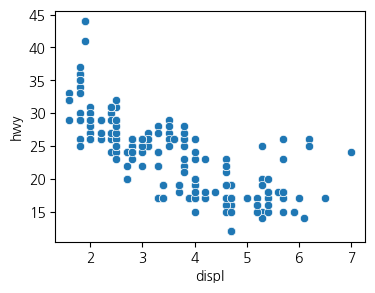

In [20]:
import koreanize_matplotlib

sns.scatterplot(data=mpg, x='displ', y='hwy')

<Axes: xlabel='displ', ylabel='hwy'>

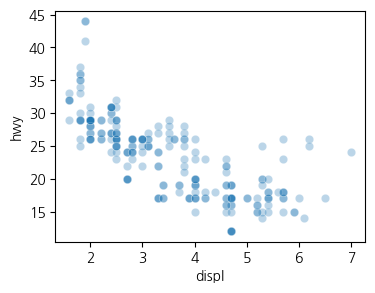

In [27]:
sns.scatterplot(data=mpg, x='displ', y='hwy', alpha=.3)

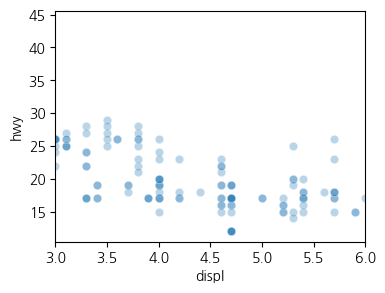

In [26]:
sns.scatterplot(data=mpg, x='displ', y='hwy', alpha=.3).set(xlim=[3, 6]);

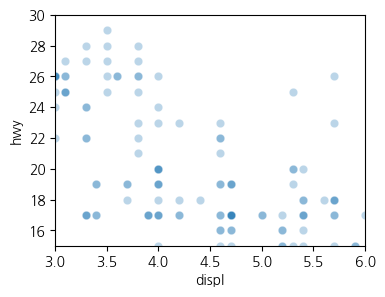

In [25]:
sns.scatterplot(data=mpg, x='displ', y='hwy', alpha=.3).set(xlim=[3,6], ylim=[15, 30]);

<Axes: xlabel='displ', ylabel='hwy'>

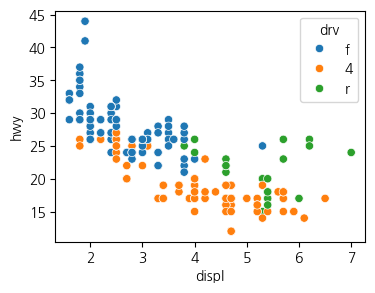

In [39]:
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='drv')

<Axes: xlabel='displ', ylabel='hwy'>

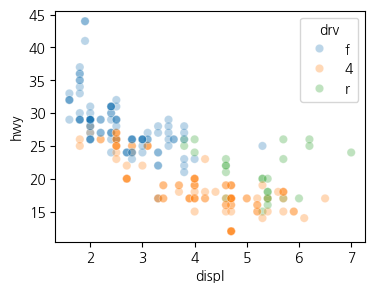

In [38]:
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='drv', alpha=.3)

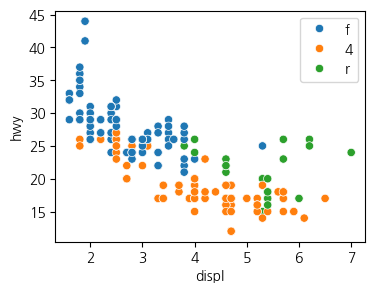

In [40]:
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='drv')
plt.legend(loc='upper right')

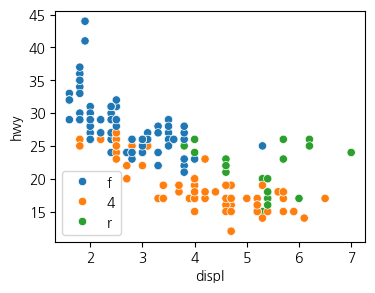

In [43]:
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='drv')
plt.legend(loc=3) # 3 = lower left / 4 = lower right

<Axes: xlabel='displ', ylabel='hwy'>

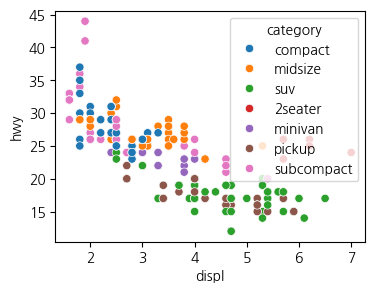

In [30]:
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='category')

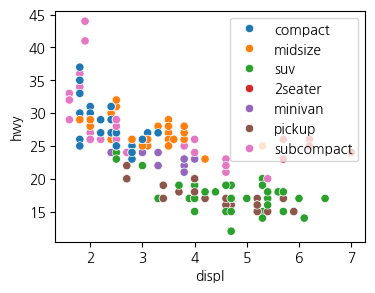

In [31]:
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='category')
plt.legend(loc='upper right')

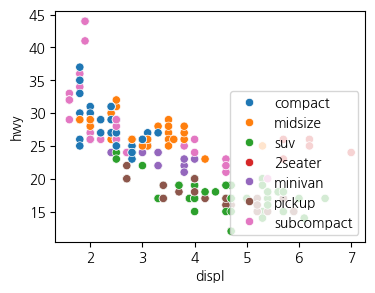

In [32]:
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='category')
plt.legend(loc='lower right')

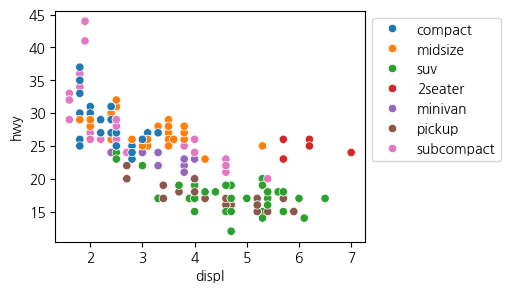

In [37]:
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='category')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

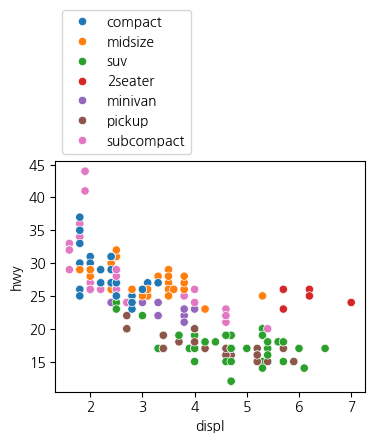

In [44]:
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='category')
plt.legend(loc='lower left', bbox_to_anchor=(0, 1))

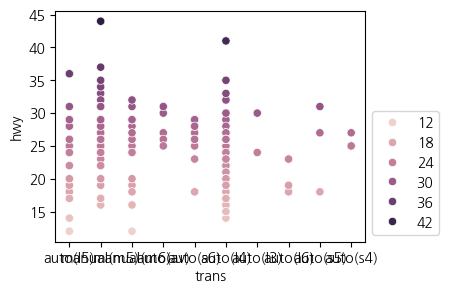

In [46]:
sns.scatterplot(data=mpg, x='trans', y='hwy', hue='hwy')
plt.legend(loc='lower left', bbox_to_anchor=(1, 0))

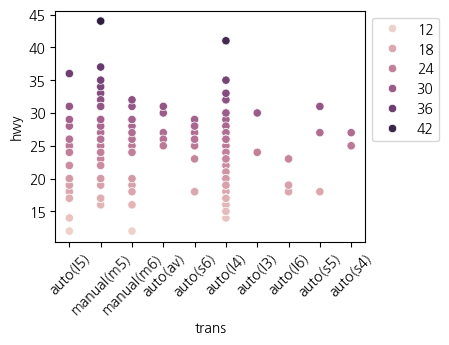

In [49]:
myPlot = sns.scatterplot(data=mpg, x='trans', y='hwy', hue='hwy')
myPlot.tick_params(axis='x', labelrotation = 45)
myPlot.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [53]:
df_mpg = mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


<Axes: xlabel='drv', ylabel='mean_hwy'>

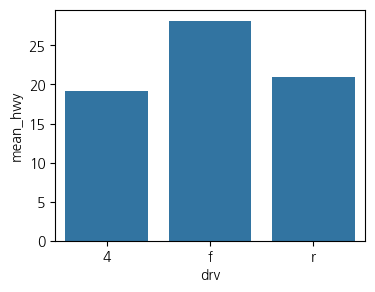

In [54]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

<Axes: xlabel='drv', ylabel='mean_hwy'>

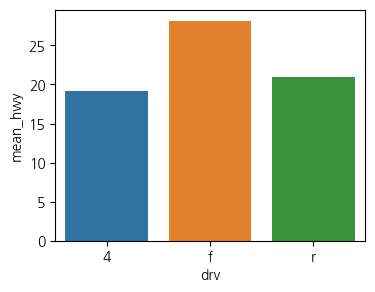

In [55]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy', hue='drv')

<Axes: xlabel='drv', ylabel='mean_hwy'>

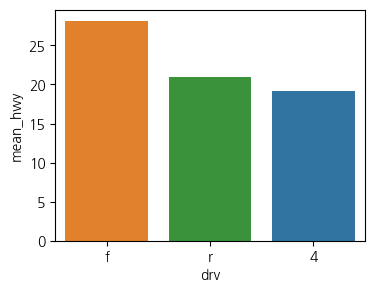

In [56]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy', hue='drv', order=['f', 'r', '4'])

<Axes: xlabel='drv', ylabel='hwy'>

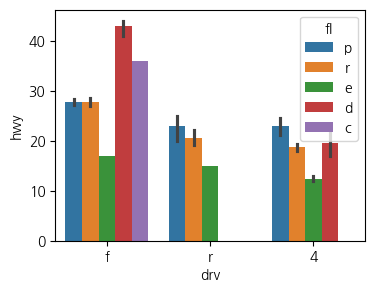

In [59]:
sns.barplot(data = mpg, x='drv', y='hwy', hue='fl', order=['f', 'r', '4'])

In [62]:
mpg.groupby('drv', as_index=False).count()[['drv', 'model']]

,drv,model
0,4,103
1,f,106
2,r,25


In [64]:
mpg.groupby('drv', as_index=False).count()[['drv', 'model']].rename(columns={'model' : 'n'})

,drv,n
0,4,103
1,f,106
2,r,25


In [66]:
df_mpg = mpg.groupby('drv', as_index=False).agg(n=('model', 'count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


In [68]:
df_mpg2 = mpg.groupby('drv').agg(n=('model', 'count'))
df_mpg2

,n
drv,
4,103
f,106
r,25


<Axes: xlabel='drv', ylabel='n'>

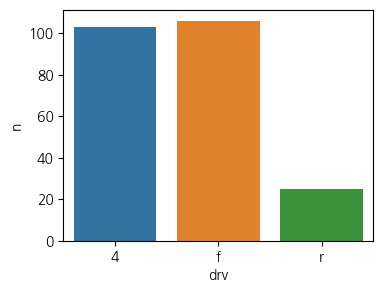

In [69]:
sns.barplot(df_mpg, x='drv', y='n', hue='drv')

<Axes: xlabel='drv', ylabel='count'>

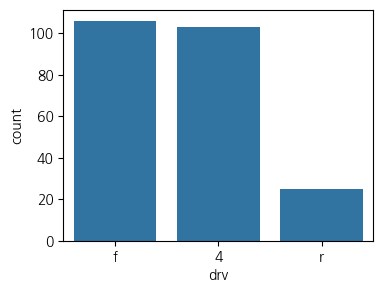

In [70]:
sns.countplot(data=mpg, x='drv')

<Axes: xlabel='drv', ylabel='count'>

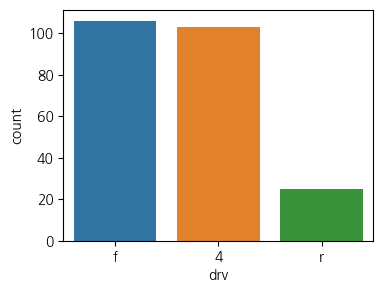

In [71]:
sns.countplot(data=mpg, x='drv', hue='drv')

<Axes: xlabel='drv', ylabel='count'>

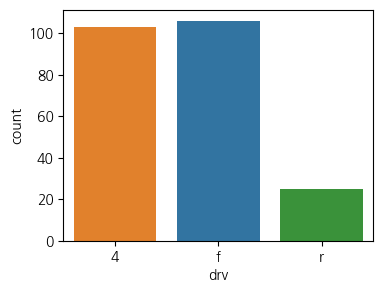

In [72]:
sns.countplot(data=mpg, x='drv', hue='drv', order=['4', 'f', 'r'])

In [74]:
mpg.drv.value_counts().index

Index(['f', '4', 'r'], dtype='object', name='drv')

<Axes: xlabel='drv', ylabel='count'>

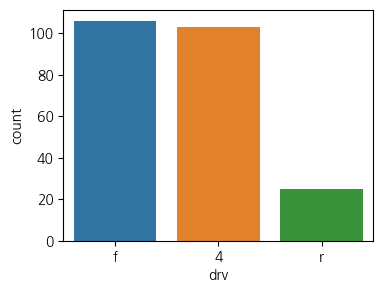

In [76]:
sns.countplot(data=mpg, x='drv', hue='drv', order=mpg.drv.value_counts().index)

In [82]:
!rm -r data

In [83]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 2.15 MiB | 5.40 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [84]:
eco = pd.read_csv('data/economics.csv')
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


In [85]:
eco.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


In [86]:
eco.shape

(574, 6)

<Axes: xlabel='date', ylabel='unemploy'>

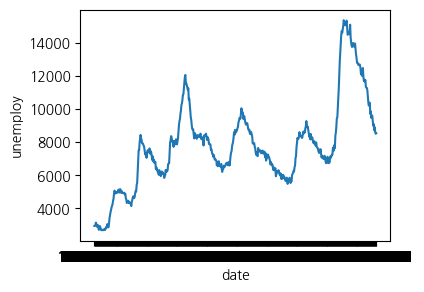

In [87]:
sns.lineplot(data=eco, x='date', y='unemploy')

<Axes: xlabel='date', ylabel='unemploy'>

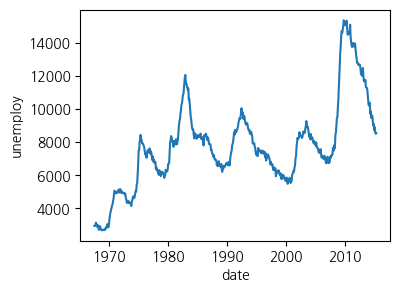

In [89]:
sns.lineplot(data=eco, x=pd.to_datetime(eco['date']), y='unemploy')

<Axes: xlabel='date', ylabel='pce'>

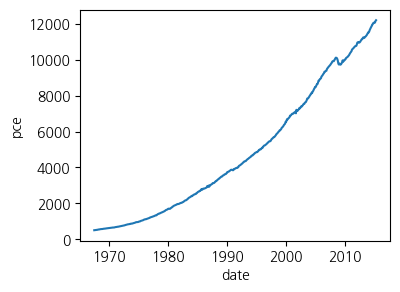

In [91]:
sns.lineplot(data=eco, x=pd.to_datetime(eco['date']), y='pce')

In [92]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


In [93]:
eco['date2'] = pd.to_datetime(eco['date'])
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [94]:
eco[['date', 'date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [95]:
eco[['date', 'date2']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    574 non-null    object        
 1   date2   574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 9.1+ KB


In [96]:
eco.date2.dt.year

,date2
0,1967
1,1967
2,1967
3,1967
4,1967
...,...
569,2014
570,2015
571,2015
572,2015


In [97]:
eco['date2'].dt.day

,date2
0,1
1,1
2,1
3,1
4,1
...,...
569,1
570,1
571,1
572,1


In [98]:
eco['year'] = eco['date2'].dt.year
eco['month'] = eco['date2'].dt.month
eco['day'] = eco['date2'].dt.day

In [99]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
 7   year      574 non-null    int32         
 8   month     574 non-null    int32         
 9   day       574 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(1), object(1)
memory usage: 38.2+ KB


<Axes: xlabel='year', ylabel='unemploy'>

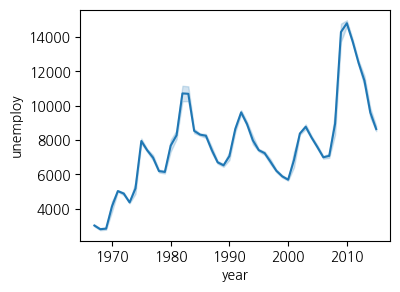

In [100]:
sns.lineplot(data=eco, x=eco['year'], y='unemploy')

<Axes: xlabel='year', ylabel='unemploy'>

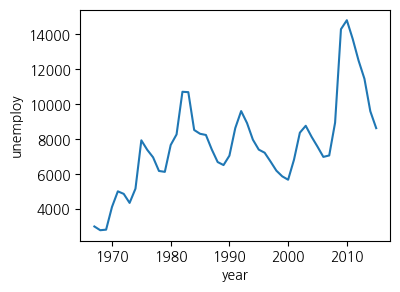

In [101]:
sns.lineplot(data=eco, x=eco['year'], y='unemploy', errorbar=None)

<Axes: xlabel='drv', ylabel='hwy'>

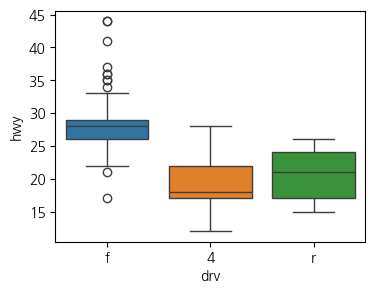

In [105]:
sns.boxplot(mpg, x='drv', y='hwy', hue='drv')

In [109]:
plt.rcParams.update({'figure.figsize' : [7, 3]})

<Axes: xlabel='category', ylabel='hwy'>

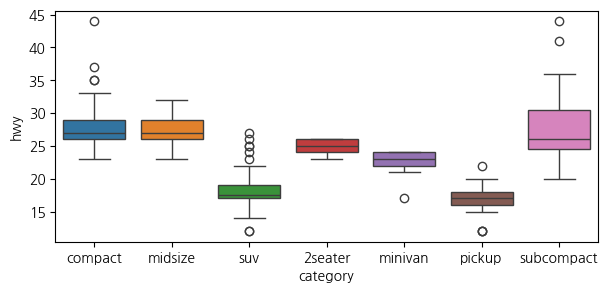

In [110]:
sns.boxplot(mpg, x='category', y='hwy', hue='category')

<Axes: xlabel='fl', ylabel='cty'>

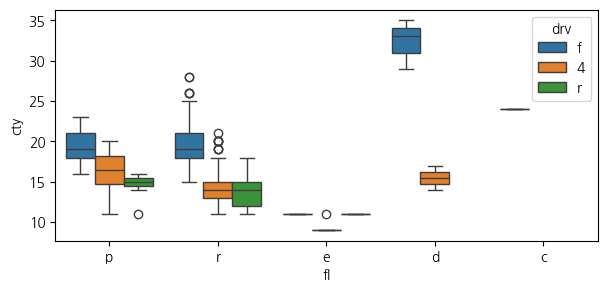

In [112]:
sns.boxplot(mpg, x='fl', y='cty', hue='drv')

In [116]:
mpg.query('fl == "e"')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,11,14,e,suv
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,11,17,e,minivan
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


In [117]:
mpg[mpg.fl == "e"]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,11,14,e,suv
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,11,17,e,minivan
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


In [118]:
plt.rcParams.update({'figure.figsize' : [5, 3]})

<Axes: xlabel='drv', ylabel='hwy'>

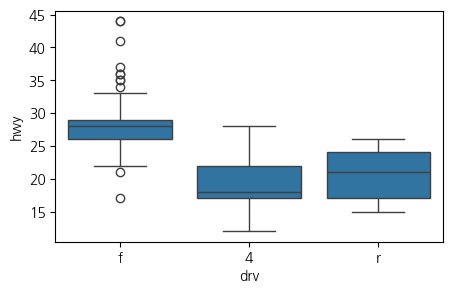

In [120]:
sns.boxplot(mpg, x='drv', y='hwy')

<Axes: xlabel='drv', ylabel='hwy'>

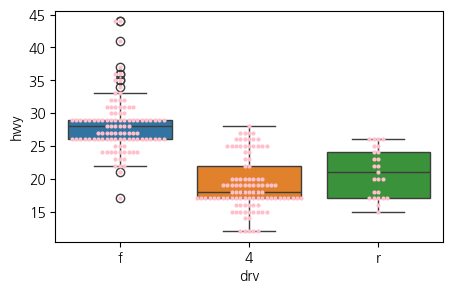

In [125]:
sns.boxplot(mpg, x='drv', y='hwy', hue='drv')
sns.swarmplot(mpg, x='drv', y='hwy', color='pink', size=3)

In [127]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str = ''
    for df in args:
      html_str += df.to_html() + '%nbsp:'*4
    display_html(html_str.replace('table', 'table style="display:inline"'), raw=True)

In [129]:
import pandas as pd
test1 = pd.DataFrame({'id'     : [1, 2, 3, 4, 5],
                      'midterm': [60, 80, 70, 90, 85]})
test2 = pd.DataFrame({'id'     : [1, 2, 3, 4, 5],
                      'midterm': [70, 83, 65, 95, 80]})

In [130]:
display_side_by_side(test1, test2, test1.merge(test2))

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
,id,midterm
0,1,70
1,2,83
2,3,65
3,4,95


In [131]:
test1

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


## 08 단원 종료